# **Proyecto Final Ingeniería Forense**
Marcela Angel Cetina - David Rengifo 

In [1]:
# Importar liberias básicas

import pandas as pd
import matplotlib.pyplot as plt
from pandas.core.tools.datetimes import to_datetime
from datetime import datetime
import numpy as np

In [2]:
# Importar datos

df_Crimes = pd.read_csv(r"C:\Users\lina.angel\Desktop\Crimes_2018_to_Present.csv")
df_Crimes.head(10)

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,12137388,JD334537,01/01/2018 12:00:00 AM,010XX W NEWPORT AVE,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,OTHER (SPECIFY),False,False,...,44.0,6.0,11,NaN,NaN,2018,08/17/2020 03:50:01 PM,NaN,NaN,NaN
1,11196173,JB105519,01/01/2018 12:00:00 AM,075XX S ST LOUIS AVE,1152,DECEPTIVE PRACTICE,ILLEGAL USE CASH CARD,RESIDENCE,False,False,...,18.0,70.0,11,1154348.0,1854412.0,2018,05/04/2018 03:51:04 PM,41.756325,-87.709916,"(41.756324845, -87.709916401)"
2,11198738,JB108247,01/01/2018 12:00:00 AM,0000X S COLUMBUS DR,0820,THEFT,$500 AND UNDER,PARKING LOT/GARAGE(NON.RESID.),False,False,...,42.0,32.0,06,1178293.0,1900315.0,2018,05/04/2018 03:51:04 PM,41.881777,-87.620768,"(41.881776822, -87.620767948)"
3,11212228,JB127156,01/01/2018 12:00:00 AM,109XX S HALSTED ST,0810,THEFT,OVER $500,NURSING HOME/RETIREMENT HOME,False,False,...,34.0,49.0,06,1172930.0,1832289.0,2018,05/04/2018 03:51:04 PM,41.695227,-87.642468,"(41.69522655, -87.642467755)"
4,11220328,JB137687,01/01/2018 12:00:00 AM,038XX N DRAKE AVE,1750,OFFENSE INVOLVING CHILDREN,CHILD ABUSE,RESIDENCE,True,True,...,35.0,16.0,20,1152042.0,1925257.0,2018,05/04/2018 03:51:04 PM,41.950778,-87.716502,"(41.950777548, -87.716502434)"
5,11220367,JB135517,01/01/2018 12:00:00 AM,042XX S TALMAN AVE,1751,OFFENSE INVOLVING CHILDREN,CRIM SEX ABUSE BY FAM MEMBER,RESIDENCE,False,False,...,12.0,58.0,20,1159402.0,1876508.0,2018,05/04/2018 03:51:04 PM,41.816857,-87.690789,"(41.816857323, -87.690789203)"
6,11227521,JB138510,01/01/2018 12:00:00 AM,022XX S SACRAMENTO AVE,1710,OFFENSE INVOLVING CHILDREN,ENDANGERING LIFE/HEALTH CHILD,RESIDENCE,False,False,...,12.0,30.0,20,1156708.0,1888988.0,2018,05/04/2018 03:51:04 PM,41.851159,-87.700334,"(41.851158797, -87.700334187)"
7,11227635,JB147669,01/01/2018 12:00:00 AM,021XX N ELSTON AVE,1155,DECEPTIVE PRACTICE,AGGRAVATED FINANCIAL IDENTITY THEFT,SMALL RETAIL STORE,False,False,...,32.0,22.0,11,1164551.0,1914302.0,2018,05/04/2018 03:51:04 PM,41.920460,-87.670831,"(41.92046017, -87.67083136)"
8,11241386,JB166453,01/01/2018 12:00:00 AM,026XX W 58TH ST,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,RESIDENCE,False,False,...,16.0,63.0,11,1159922.0,1866106.0,2018,05/04/2018 03:51:04 PM,41.788302,-87.689168,"(41.788302206, -87.689167668)"
9,11249232,JB176538,01/01/2018 12:00:00 AM,113XX S LANGLEY AVE,1562,SEX OFFENSE,AGG CRIMINAL SEXUAL ABUSE,RESIDENCE,True,False,...,9.0,50.0,17,1182937.0,1829821.0,2018,05/16/2018 04:09:42 PM,41.688228,-87.605905,"(41.688227926, -87.605905475)"


In [3]:
# Nombre de las Columnas

print(df_Crimes.columns.tolist())

['ID', 'Case Number', 'Date', 'Block', 'IUCR', 'Primary Type', 'Description', 'Location Description', 'Arrest', 'Domestic', 'Beat', 'District', 'Ward', 'Community Area', 'FBI Code', 'X Coordinate', 'Y Coordinate', 'Year', 'Updated On', 'Latitude', 'Longitude', 'Location']


In [4]:
# Display format

pd.set_option('display.float_format', lambda x: '%.3f' % x) #
df_Crimes.describe()

,ID,Beat,District,Ward,Community Area,X Coordinate,Y Coordinate,Year,Latitude,Longitude
count,1143796.000,1143796.000,1143796.000,1143747.000,1143795.000,1126762.000,1126762.000,1143796.000,1126762.000,1126762.000
mean,11985047.192,1144.955,11.221,23.259,36.772,1165084.659,1886182.292,2019.823,41.843,-87.670
std,806688.656,698.491,6.979,13.978,21.515,16411.467,31751.795,1.413,0.087,0.060
min,23757.000,111.000,1.000,1.000,1.000,0.000,0.000,2018.000,36.619,-91.687
25%,11581314.750,611.000,6.000,10.000,23.000,1153382.000,1858730.000,2019.000,41.768,-87.712
50%,12005670.000,1024.000,10.000,24.000,32.000,1166927.000,1892824.000,2020.000,41.862,-87.663
75%,12445573.250,1722.000,17.000,34.000,54.000,1176648.000,1908808.000,2021.000,41.906,-87.627
max,12884018.000,2535.000,31.000,50.000,77.000,1205119.000,1951535.000,2022.000,42.023,-87.525


Al observar la base de datos y leer el enunciado, podemos determinar que algunas columnas de datos no serán necesarias para el procesamiento y analisis de los datos requerido, por lo que se procede a eliminarlas.

In [5]:
# Eliminar columnas que no se van a necesitar para el procesamiento y analisís de la base de datos 
df_Crimes.drop(["ID","Case Number", "Block", 'IUCR', 'Description', 'Ward', 'FBI Code', 'X Coordinate', 'Y Coordinate','Updated On', 'Latitude', 'Longitude'], axis=1, inplace = True)
df_Crimes.head()


,Date,Primary Type,Location Description,Arrest,Domestic,Beat,District,Community Area,Year,Location
0,01/01/2018 12:00:00 AM,DECEPTIVE PRACTICE,OTHER (SPECIFY),False,False,1924,19,6.000,2018,NaN
1,01/01/2018 12:00:00 AM,DECEPTIVE PRACTICE,RESIDENCE,False,False,835,8,70.000,2018,"(41.756324845, -87.709916401)"
2,01/01/2018 12:00:00 AM,THEFT,PARKING LOT/GARAGE(NON.RESID.),False,False,114,1,32.000,2018,"(41.881776822, -87.620767948)"
3,01/01/2018 12:00:00 AM,THEFT,NURSING HOME/RETIREMENT HOME,False,False,2233,22,49.000,2018,"(41.69522655, -87.642467755)"
4,01/01/2018 12:00:00 AM,OFFENSE INVOLVING CHILDREN,RESIDENCE,True,True,1732,17,16.000,2018,"(41.950777548, -87.716502434)"


In [6]:
#Se realiza la separación de los datos de la columna Date en Month, Hour, Weekday

df_Crimes['Date'] = pd.to_datetime(df_Crimes['Date'])
df_Crimes['Month'] = df_Crimes['Date'].dt.month
df_Crimes['Hour'] = df_Crimes['Date'].dt.hour
df_Crimes['Week Day'] = df_Crimes['Date'].dt.weekday

In [7]:
df_Crimes

,Date,Primary Type,Location Description,Arrest,Domestic,Beat,District,Community Area,Year,Location,Month,Hour,Week Day
0,2018-01-01 00:00:00,DECEPTIVE PRACTICE,OTHER (SPECIFY),False,False,1924,19,6.000,2018,NaN,1,0,0
1,2018-01-01 00:00:00,DECEPTIVE PRACTICE,RESIDENCE,False,False,835,8,70.000,2018,"(41.756324845, -87.709916401)",1,0,0
2,2018-01-01 00:00:00,THEFT,PARKING LOT/GARAGE(NON.RESID.),False,False,114,1,32.000,2018,"(41.881776822, -87.620767948)",1,0,0
3,2018-01-01 00:00:00,THEFT,NURSING HOME/RETIREMENT HOME,False,False,2233,22,49.000,2018,"(41.69522655, -87.642467755)",1,0,0
4,2018-01-01 00:00:00,OFFENSE INVOLVING CHILDREN,RESIDENCE,True,True,1732,17,16.000,2018,"(41.950777548, -87.716502434)",1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1143791,2022-10-30 23:39:00,OTHER OFFENSE,SMALL RETAIL STORE,False,False,2532,25,25.000,2022,"(41.909427341, -87.761526045)",10,23,6
1143792,2022-10-30 23:42:00,CRIMINAL DAMAGE,APARTMENT,False,False,1011,10,29.000,2022,"(41.865175251, -87.727587068)",10,23,6
1143793,2022-10-30 23:50:00,MOTOR VEHICLE THEFT,DRIVEWAY - RESIDENTIAL,False,False,414,4,43.000,2022,"(41.754906915, -87.566293711)",10,23,6
1143794,2022-10-30 23:50:00,BATTERY,SIDEWALK,False,True,2031,20,4.000,2022,"(41.969297617, -87.693822931)",10,23,6


En la separación anterior se otienen los días de la semana en valores númericos del 0 (Monday) al 6 (Sunday) por lo que se procede a convertir esos números a los nombres de cada día correspondiente.

In [8]:
#de Lunes-Domingo columna Weekday
def num_2_day(value):
  Week_days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
  return Week_days[value]

In [9]:
df_Crimes['Week Day'] = df_Crimes['Week Day'].apply(num_2_day)

**Comenzamos con el analisis de datos para resolver unas cuantas preguntas:**


In [10]:
import seaborn as sns

*¿Cómo han cambiado la cantidad de crímenes reportados anualmente?*


Para dar respuesta a la pregunta, se realiza una gráfica que muestra la cantidad de veces que aparece cada año en la base de datos, para así poder evidenciar en que año se reportaron más crímenes.

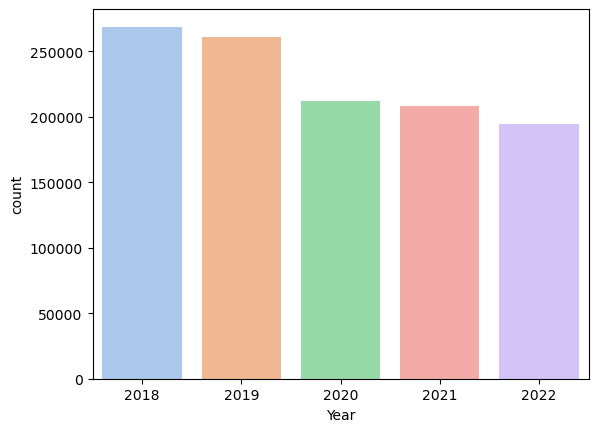

In [11]:
#Tabulación de la cantidad de veces que aparece un año en la base de datos
sns.set_palette("pastel")
sns.countplot(x=df_Crimes['Year'])
plt.show()

Según la tabla podemos evidenciar que el 2018 fue el año en el que se reportaron más crímenes.

*¿Cuáles son los meses, días de la semana, y hora del día con mayores índices de criminalidad?*


Para dar respuesta a la pregunta, se realizan 3 gráficas que muestra la cantidad de veces que aparece cada mes, día y hora en la base de datos, para así poder evidenciar en que mes, día y hora se reportaron más crímenes.

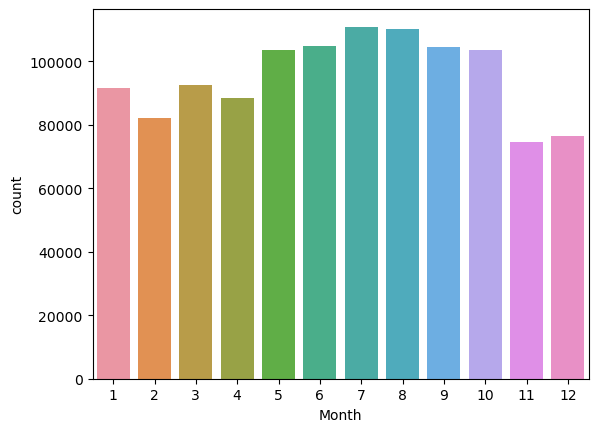

In [12]:
#Tabulación de la cantidad de veces que aparece un mes en la base de datos
sns.set_palette("pastel")
sns.countplot(x=df_Crimes['Month'])
plt.show()

Según la tabla podemos evidenciar que el mes 7, es decir Julio fue el mes en el que se reportaron más crímenes.

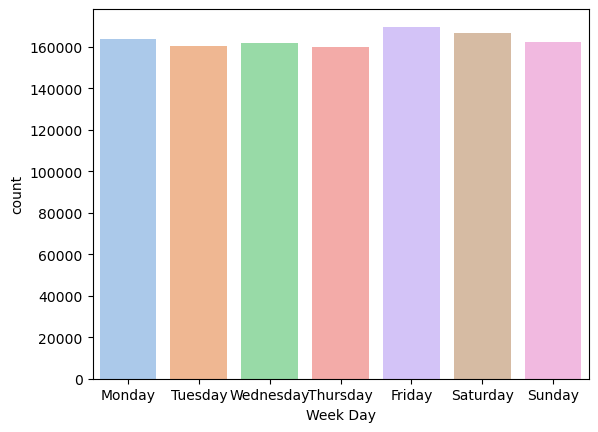

In [13]:
#Tabulación de la cantidad de veces que aparece una día de la semana en la base de datos
sns.set_palette("pastel")
sns.countplot(x=df_Crimes['Week Day'])
plt.show()

Según la tabla podemos evidenciar que los días viernes, fueron los días de la semana en los que se reportaron más crímenes.

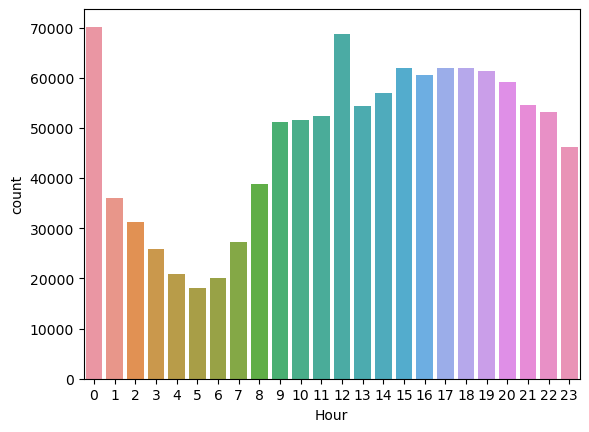

In [14]:
#Tabulación de la cantidad de veces que aparece una hora en la base de datos
sns.set_palette("pastel")
sns.countplot(x=df_Crimes['Hour'])
plt.show()

Según la tabla podemos evidenciar que a la media noche, fue la hora e la que se reportaron más crímenes.

*¿La pandemia afectó la tasa de crímenes en la ciudad?*

Para responder esta pregunta, se vuelve a tomar como referencia la gáfica que muestra la cantidad de veces que aparece cada año en la base de datos.
La pandemía emepezó en el 2020 (inicios) y terminó en el 2021 (finales), en la gráfica se puede observar que del 2018 al 2019 hubo un decremento no tan significativo, sin embargo, del 2019 al 2020 la cantidad de crimenes reportados bajo considerablemente y se mantuvo casi constante en 2021, por lo qie se puede inferir que al estar en cuarentena estricta durante largos periodos por la pandemía bajó la cantidad de crímenes reportados. 

*¿Cuáles son los Tipos de Crímenes más comunes?*

Para responder esta pregunta, se realiza una gráfica quue muestra la cantidad de veces que aparece cada crímen en la base de datos, para así poder evidenciar cuales son los crímenes más reportados.

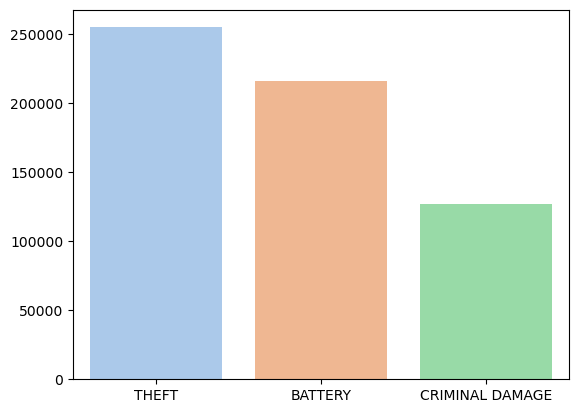

In [15]:
#Tabulación de la cantidad de veces que aparecen los crímenes en la base de datos
Common_crimes = df_Crimes['Primary Type'][df_Crimes['Primary Type'].notna()].value_counts()[:3]

sns.set_palette("pastel")
sns.barplot(x=Common_crimes.keys(), y=Common_crimes.values)
plt.show()

Se selecionaron los 3 críemenes que más se repitieron en la base de datos, siendo robo, agresión y daño, los crimenes más comunes.

*¿En qué localizaciones ocurren más incidentes por tipo de crimen?*

Se cuentan los datos de la columna Primary Type que no son NAN para observar cuales son los tipos de crímenes y cuantas veces están reportados cada uno

In [16]:
df_Crimes['Primary Type'][df_Crimes['Primary Type'].notna()].value_counts()[:60]

THEFT                                254855
BATTERY                              215858
CRIMINAL DAMAGE                      126808
ASSAULT                               97049
DECEPTIVE PRACTICE                    86046
OTHER OFFENSE                         72688
MOTOR VEHICLE THEFT                   55124
NARCOTICS                             44460
BURGLARY                              42972
ROBBERY                               40652
WEAPONS VIOLATION                     36748
CRIMINAL TRESPASS                     24839
OFFENSE INVOLVING CHILDREN            10232
SEX OFFENSE                            5573
PUBLIC PEACE VIOLATION                 5369
CRIMINAL SEXUAL ASSAULT                4964
INTERFERENCE WITH PUBLIC OFFICER       4167
HOMICIDE                               3309
CRIM SEXUAL ASSAULT                    2403
ARSON                                  2221
PROSTITUTION                           2034
STALKING                               1340
LIQUOR LAW VIOLATION            

Se va a utilizar un HeatMap, para realizarlo se necesita organizar o agrupar las locaciones en diferentes categorías:  

In [17]:
#Se crea una función donde se agrupan las locaciones en diferentes categorías
def Organize_locations(value):
  if pd.isna(value):
    return np.nan

  else:
    if ('RESIDEN') in value or ('APARTMENT') in value or ('HOTEL') in value: 
      return 'RESIDENTIAL & RELATED'
    elif ('AIRPORT') in value: 
      return 'AIRPORT & RELATED'
    elif ('BANK') in value or ('CURRENC') in value:
      return 'BANK & RELATED'
    elif ('GOVERN') in value:
      return 'GOVERNMENT BUILDINS & RELATED'
    elif ('HOSPITAL') in value or ('NURS') in value:
      return 'HOSPITALS & RELATED'
    elif ('LIQUOR') in value or ('BAR') in value:
      return 'LIQUOR STORES & RELATED'
    elif ('CTA') in value:
      return 'PUBLIC TRANSPORT & RELATED'
    elif ('STORE') in value or ('GAS') in value or ('OFFICE') in value:
      return 'STORES & RELATED'
    elif ('STREET') in value or ('ALLEY') in value or ('SIDEWALK') in value or ('PARK') in value or ('LOT') in value:
      return 'STREETS & RELATED'
    elif ('VEHICLE') in value or ('AUTO') in value or ('CAR') in value:
      return 'VEHICLES & RELATED'
    elif ('SCHOOL') in value:
      return 'COLLEGES & RELATED'
    elif ('RESTAURANT') in value:
      return 'RESTAURANT & RELATED'
    else:
      return 'OTHER LOCATIONS'

In [18]:
#Se guardan los cambios realizados en las agrupaciones 
df_Crimes['Location Description'] = df_Crimes['Location Description'].apply(Organize_locations)

Ahora podemos observar las 13 categorías creadas para locaciones y la cantidad de crímenes reportados en cada una

In [19]:
df_Crimes['Location Description'].value_counts()

RESIDENTIAL & RELATED            455424
STREETS & RELATED                406579
STORES & RELATED                 104993
OTHER LOCATIONS                   49179
RESTAURANT & RELATED              25553
VEHICLES & RELATED                24334
PUBLIC TRANSPORT & RELATED        22087
COLLEGES & RELATED                16870
LIQUOR STORES & RELATED           10807
HOSPITALS & RELATED               10132
BANK & RELATED                     5809
AIRPORT & RELATED                  4958
GOVERNMENT BUILDINS & RELATED      2099
Name: Location Description, dtype: int64

También se agrupan los tipos de crímenes en categorías más generales 

In [20]:
#Se crea una función donde se agrupan los tipos de crímenes en diferentes categorías
def Organize_crimes(value):
  if pd.isna(value):
    return np.nan

  else:
    if ('BATTERY') in value or ('ASSAULT') in value or ('CRIMINAL DAMAGE') in value or ('OFFEN') in value or ('HOMICID') in value or ('INTIMIDA') in value: 
      return 'VIOLENCE & RELATED'
    elif ('THEFT') in value or ('BURGLARY') in value or ('ROBBERY') in value:
      return 'THEFT & RELATED'
    elif ('PUBLIC') in value or ('ARSON') in value or ('RITUALi') in value or ('STALK') in value or ('DECEPTIVE') in value:
      return 'PUBLIC ORDER & RELATED'
    elif ('SEX') in value or ('PROSTITUTION') in value or ('HUMAN TRAFFIC') in value or ('OBSCEN') in value: 
      return 'SEXUAL OFFENSES & RELATED'
    elif ('NARCO') in value or ('LIQUOR') in value:
      return 'SUBSTANCES & RELATED'
    elif ('TRESPASS') in value or ('PROPERTY') in value:
      return 'PROPERTY DAMAGES & RELATED'
    else:
      return 'OTHER OFFENSES'

In [21]:
#Se guardan los cambios realizados en las agrupaciones 
df_Crimes['Primary Type'] = df_Crimes['Primary Type'].apply(Organize_crimes)

Ahora podemos observar las 7 categorías creadas para los tipos de crímenes y la cantidad reportada de cada una

In [22]:
df_Crimes['Primary Type'].value_counts()

VIOLENCE & RELATED            539639
THEFT & RELATED               393603
PUBLIC ORDER & RELATED         99185
SUBSTANCES & RELATED           45479
OTHER OFFENSES                 38672
PROPERTY DAMAGES & RELATED     24839
SEXUAL OFFENSES & RELATED       2379
Name: Primary Type, dtype: int64

Se genera un dataset donde se guarden los valores de locaciones y tipos de crimen y exista una relación entre ellos, es decir que cantidad de crímenes existen por locacion y tipo de crímen

In [23]:
df_Heatmap_Crim_Loc = pd.DataFrame(columns = ['Primary Type', 'Location Description', 'Count'])

for i in df_Crimes['Primary Type'][df_Crimes['Primary Type'].notna()].value_counts().keys():
  
  for j in df_Crimes['Location Description'][df_Crimes['Location Description'].notna()].value_counts().keys():
    
    df_Heatmap_Crim_Loc.loc[len(df_Heatmap_Crim_Loc)] = [i, j, len(df_Crimes[df_Crimes['Primary Type']==i][df_Crimes['Location Description'] == j])]


C:\Users\lina.angel\AppData\Local\Temp\ipykernel_13316\998793530.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_Heatmap_Crim_Loc.loc[len(df_Heatmap_Crim_Loc)] = [i, j, len(df_Crimes[df_Crimes['Primary Type']==i][df_Crimes['Location Description'] == j])]
C:\Users\lina.angel\AppData\Local\Temp\ipykernel_13316\998793530.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_Heatmap_Crim_Loc.loc[len(df_Heatmap_Crim_Loc)] = [i, j, len(df_Crimes[df_Crimes['Primary Type']==i][df_Crimes['Location Description'] == j])]
C:\Users\lina.angel\AppData\Local\Temp\ipykernel_13316\998793530.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_Heatmap_Crim_Loc.loc[len(df_Heatmap_Crim_Loc)] = [i, j, len(df_Crimes[df_Crimes['Primary Type']==i][df_Crimes['Location Description'] == j])]
C:\Users\lina.angel\AppData\Local\Temp\ipykernel_13316\998793530.py:7: UserWarning: Boolean Series key will be reindex

Para poder realizar el pivot al dataset y luego el HeatMap, se debe convertir los valores de la columna Count de tipo string o object a float

In [24]:
df_Heatmap_Crim_Loc['Count']=df_Heatmap_Crim_Loc['Count'].astype(float)
df_Heatmap_Crim_Loc.dtypes

Primary Type             object
Location Description     object
Count                   float64
dtype: object

In [25]:
#Se realiza el pivot al dataset 
heatmap_pivot = df_Heatmap_Crim_Loc.pivot_table(index= 'Primary Type', columns = 'Location Description', values = 'Count')
heatmap_pivot

Location Description,AIRPORT & RELATED,BANK & RELATED,COLLEGES & RELATED,GOVERNMENT BUILDINS & RELATED,HOSPITALS & RELATED,LIQUOR STORES & RELATED,OTHER LOCATIONS,PUBLIC TRANSPORT & RELATED,RESIDENTIAL & RELATED,RESTAURANT & RELATED,STORES & RELATED,STREETS & RELATED,VEHICLES & RELATED
Primary Type,,,,,,,,,,,,,
OTHER OFFENSES,345.000,11.000,254.000,14.000,54.000,61.000,283.000,181.000,5057.000,96.000,928.000,30181.000,1207.000
PROPERTY DAMAGES & RELATED,487.000,114.000,500.000,103.000,358.000,241.000,1747.000,683.000,10082.000,1287.000,4821.000,4043.000,373.000
PUBLIC ORDER & RELATED,615.000,3702.000,673.000,259.000,560.000,784.000,9480.000,1573.000,49656.000,2972.000,9489.000,12260.000,2202.000
SEXUAL OFFENSES & RELATED,0.000,0.000,46.000,0.000,5.000,3.000,43.000,6.000,257.000,3.000,20.000,1992.000,4.000
SUBSTANCES & RELATED,195.000,12.000,421.000,343.000,448.000,548.000,832.000,572.000,4286.000,277.000,1225.000,34173.000,2147.000
THEFT & RELATED,2085.000,993.000,2699.000,310.000,2006.000,4954.000,17769.000,9711.000,115612.000,12069.000,62731.000,152669.000,9987.000
VIOLENCE & RELATED,1231.000,977.000,12277.000,1070.000,6701.000,4216.000,19025.000,9361.000,270474.000,8849.000,25779.000,171261.000,8414.000


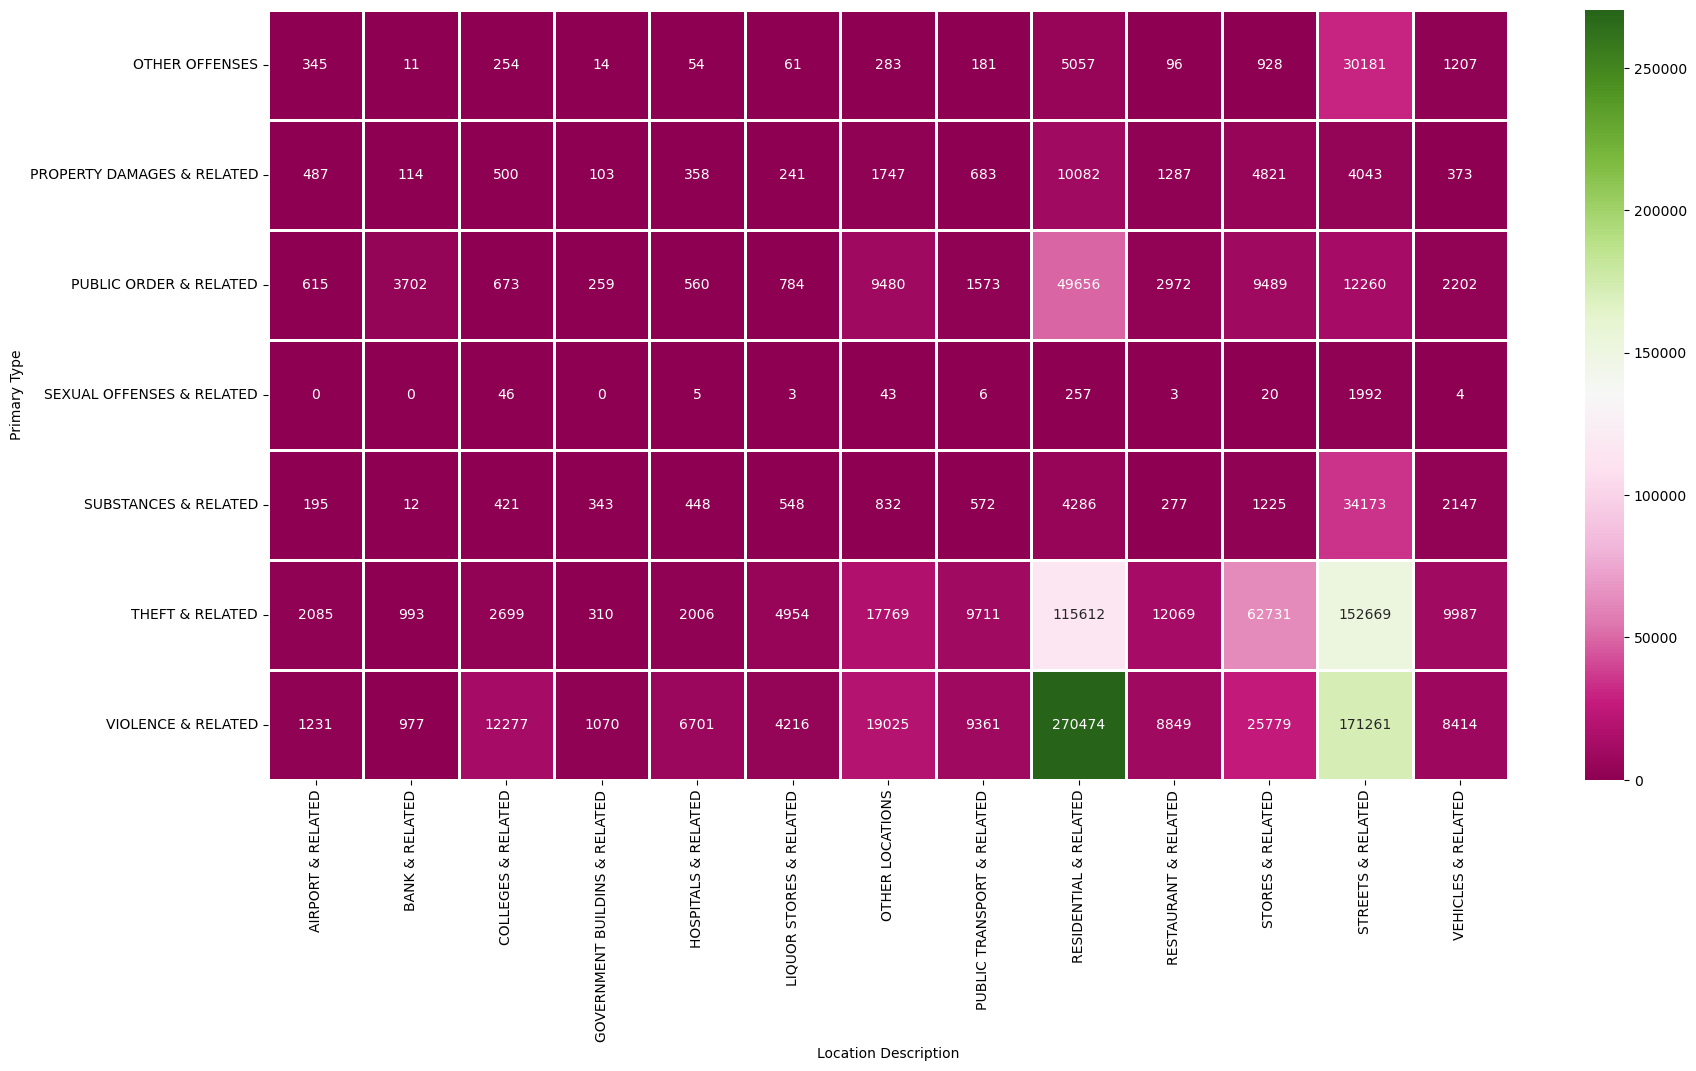

In [26]:
#Heatmap que relaciona en qué localizaciones ocurren más incidentes por tipo de crimen
fig, ax = plt.subplots(figsize = (20,10))
sns.heatmap(heatmap_pivot, square = False, fmt = ".0f", linewidths = 2, annot = True, cmap = "PiYG")
plt.show()

Respondiendo a la pregunta, el tipo de crímen que más ocurre en más locaciones de tipo residencial son los de violencia y relacionados 

*¿En qué días de la semana ocurren más incidentes por tipo de crimen?*

Se genera un dataset donde se guarden los días y tipos de crimen para que exista una relación entre ellos, es decir que cantidad de crímenes existen por día y tipo de crímen

In [27]:
df_Heatmap_Crim_Days = pd.DataFrame(columns = ['Primary Type', 'Week Day', 'Count'])

for i in df_Crimes['Primary Type'][df_Crimes['Primary Type'].notna()].value_counts().keys():
  
  for j in df_Crimes['Week Day'][df_Crimes['Week Day'].notna()].value_counts().keys():
    
    df_Heatmap_Crim_Days.loc[len(df_Heatmap_Crim_Days)] = [i, j, len(df_Crimes[df_Crimes['Primary Type']==i][df_Crimes['Week Day'] == j])]


C:\Users\lina.angel\AppData\Local\Temp\ipykernel_13316\2400806684.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_Heatmap_Crim_Days.loc[len(df_Heatmap_Crim_Days)] = [i, j, len(df_Crimes[df_Crimes['Primary Type']==i][df_Crimes['Week Day'] == j])]
C:\Users\lina.angel\AppData\Local\Temp\ipykernel_13316\2400806684.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_Heatmap_Crim_Days.loc[len(df_Heatmap_Crim_Days)] = [i, j, len(df_Crimes[df_Crimes['Primary Type']==i][df_Crimes['Week Day'] == j])]
C:\Users\lina.angel\AppData\Local\Temp\ipykernel_13316\2400806684.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_Heatmap_Crim_Days.loc[len(df_Heatmap_Crim_Days)] = [i, j, len(df_Crimes[df_Crimes['Primary Type']==i][df_Crimes['Week Day'] == j])]
C:\Users\lina.angel\AppData\Local\Temp\ipykernel_13316\2400806684.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame inde

Para poder realizar el pivot al dataset y luego el HeatMap, se debe convertir los valores de la columna Count de tipo string o object a float

In [28]:
df_Heatmap_Crim_Days['Count']=df_Heatmap_Crim_Days['Count'].astype(float)
df_Heatmap_Crim_Days.dtypes

Primary Type     object
Week Day         object
Count           float64
dtype: object

In [29]:
#Se realiza el pivot al dataset 
df_Heatmap_Crim_Days = df_Heatmap_Crim_Days.pivot_table(index= 'Primary Type', columns = 'Week Day', values = 'Count')
df_Heatmap_Crim_Days

Week Day,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
Primary Type,,,,,,,
OTHER OFFENSES,5697.000,5273.000,6616.000,6375.000,4936.000,4892.000,4883.000
PROPERTY DAMAGES & RELATED,3657.000,3670.000,3330.000,3345.000,3527.000,3638.000,3672.000
PUBLIC ORDER & RELATED,15687.000,15529.000,11662.000,10715.000,14982.000,15391.000,15219.000
SEXUAL OFFENSES & RELATED,416.000,139.000,325.000,302.000,404.000,330.000,463.000
SUBSTANCES & RELATED,7634.000,6088.000,6481.000,5586.000,6367.000,6528.000,6795.000
THEFT & RELATED,59542.000,56771.000,57035.000,52058.000,56175.000,55752.000,56270.000
VIOLENCE & RELATED,76948.000,76154.000,81345.000,83691.000,73546.000,73582.000,74373.000


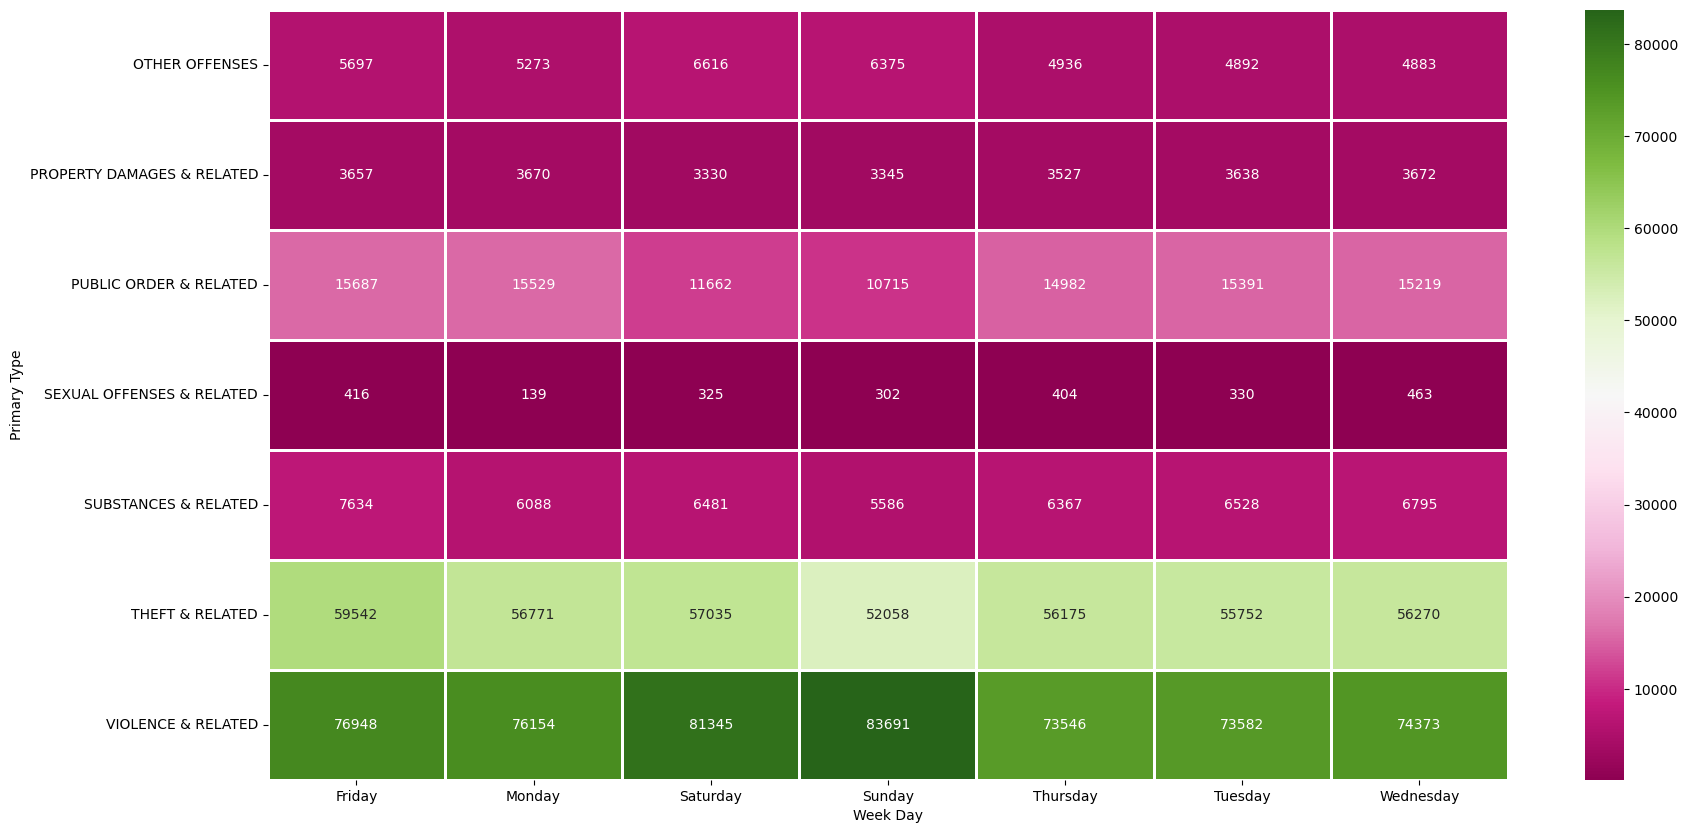

In [30]:
#Heatmap que relaciona en qué días de la semana ocurren más incidentes por tipo de crimen
fig, ax = plt.subplots(figsize = (20,10))
sns.heatmap(df_Heatmap_Crim_Days, square = False, fmt = ".0f", linewidths = 2, annot = True, cmap = "PiYG")
plt.show()

Respondiendo a la pregunta, el día en el que ocurren más icidentes de tipo violencia y relacionadas son los días domingos

*¿Cuál es la proporción de incidentes en los que hubo arresto?*

In [31]:
Porportion_of_arrests = df_Crimes['Arrest'][df_Crimes['Arrest'].notna()].value_counts()

print(f'La proporción de incidentes en los que hubo arresto fue de {Porportion_of_arrests[1]*100/(Porportion_of_arrests[0]+Porportion_of_arrests[1]):.3f} %' )

La proporción de incidentes en los que hubo arresto fue de 16.790 %


*¿Cuál es la proporción de incidente de tipo doméstico?*

In [32]:
Porportion_domestic = df_Crimes['Domestic'][df_Crimes['Domestic'].notna()].value_counts()

print(f'La proporción de incidentes de tipo domestico fue de {Porportion_domestic[1]*100/(Porportion_domestic[0]+Porportion_domestic[1]):.3f} %' )

La proporción de incidentes de tipo domestico fue de 18.178 %


*¿Cuáles son los cuadrantes y distritos con más reportes de crímenes? Para esto se sugiere usar
un HeatMap con folium.*

# Mapas por cuadrantes y distritos 

*MAPA POR CUADRANTES*

Se crea un nuevo dataset con los datos de la columna "Beat" o cuadrante y con la cantidad de crímenes por cada uno.

En el mapa se puede evidenciar según la escala de colores, cuales son los cuadrantes donde más crímenes han sido reportados. Siendo los distritos 6, 8 y 11 en los que más se han reportado.

 **Pre procesamiento para los Modelos de Predicción**

Para que los modelos de clasificación funcionen de manera correcta, se decidió pasar los valores tipo String u Object a númericos.
Se crean dos funciones, una para los días de la semana y otra para las categorias de locaciones agrupadas anteriormente, para que se le asigne el valor de la posición donde esta guardado en el vector.

In [33]:
def weekday_to_num(value):
  Week_days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
  return Week_days.index(value)

def location_2_num(value):
  Week_days = ['RESIDENTIAL & RELATED', 'STREETS & RELATED', 'STORES & RELATED',
       'OTHER LOCATIONS', 'RESTAURANT & RELATED', 'VEHICLES & RELATED',
       'PUBLIC TRANSPORT & RELATED', 'COLLEGES & RELATED',
       'LIQUOR STORES & RELATED', 'HOSPITALS & RELATED', 'BANK & RELATED',
       'AIRPORT & RELATED', 'GOVERNMENT BUILDINS & RELATED']
  return Week_days.index(value)

In [34]:
df_Crimes['Location Description'].value_counts()

RESIDENTIAL & RELATED            455424
STREETS & RELATED                406579
STORES & RELATED                 104993
OTHER LOCATIONS                   49179
RESTAURANT & RELATED              25553
VEHICLES & RELATED                24334
PUBLIC TRANSPORT & RELATED        22087
COLLEGES & RELATED                16870
LIQUOR STORES & RELATED           10807
HOSPITALS & RELATED               10132
BANK & RELATED                     5809
AIRPORT & RELATED                  4958
GOVERNMENT BUILDINS & RELATED      2099
Name: Location Description, dtype: int64

In [35]:
# Se eliminan las columnas de Date y Location para el modelo porque no se necesitan
x = df_Crimes.drop(['Primary Type', 'Date', 'Location'], axis=1)

x['Week Day'] = x['Week Day'].apply(weekday_to_num)
x = x.dropna(subset=['Location Description', 'Community Area'])
x['Location Description'] = x['Location Description'].apply(location_2_num)

# Eliminar las filas que tienen NaN en Location Description
x

,Location Description,Arrest,Domestic,Beat,District,Community Area,Year,Month,Hour,Week Day
0,3,False,False,1924,19,6.000,2018,1,0,0
1,0,False,False,835,8,70.000,2018,1,0,0
2,1,False,False,114,1,32.000,2018,1,0,0
3,9,False,False,2233,22,49.000,2018,1,0,0
4,0,True,True,1732,17,16.000,2018,1,0,0
...,...,...,...,...,...,...,...,...,...,...
1143791,2,False,False,2532,25,25.000,2022,10,23,6
1143792,0,False,False,1011,10,29.000,2022,10,23,6
1143793,0,False,False,414,4,43.000,2022,10,23,6
1143794,1,False,True,2031,20,4.000,2022,10,23,6


In [36]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.model_selection import RepeatedStratifiedKFold, cross_val_score

In [37]:
y = df_Crimes.dropna(subset=['Location Description', 'Community Area'])['Primary Type'].values
y

array(['PUBLIC ORDER & RELATED', 'PUBLIC ORDER & RELATED',
       'THEFT & RELATED', ..., 'THEFT & RELATED', 'VIOLENCE & RELATED',
       'THEFT & RELATED'], dtype=object)

In [38]:
# Importar liberia para separar los datos
from sklearn.model_selection import train_test_split

In [39]:
# Split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.25)

In [40]:
print(len(x_train), len(x_test))
print(len(y_train), len(y_test))

854117 284706
854117 284706


<Axes: ylabel='count'>

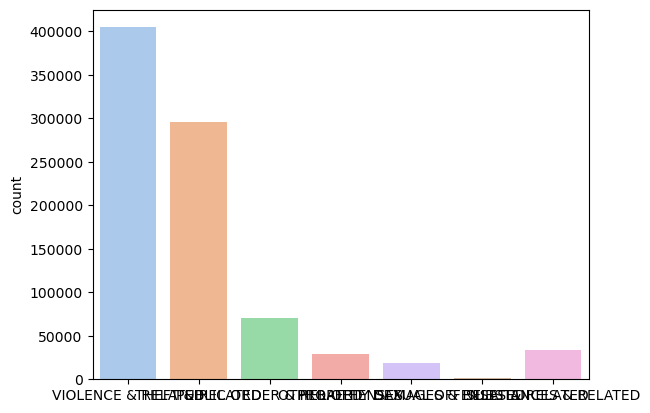

In [41]:
# Train
sns.set_palette("pastel")
sns.countplot(x=y_train)

<Axes: ylabel='count'>

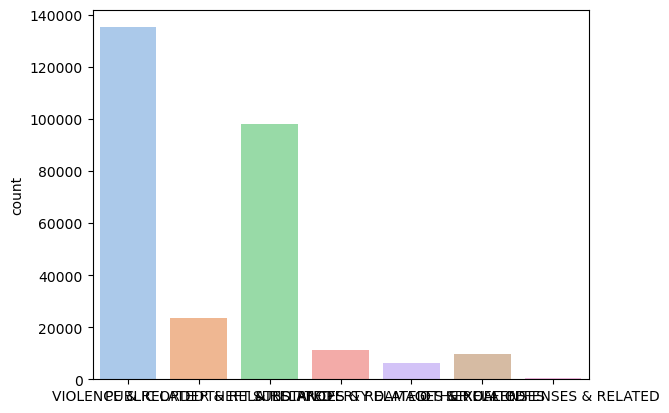

In [42]:
# Test
sns.set_palette("pastel")
sns.countplot(x=y_test)

Se evidencia que hay un desbalance entre las clases, más adelante trabajaremos en el balanceo de dichas clases y compararemos el desempeño de ambas aproximaciones.

# **Modelos de predicción**

In [43]:
# Importar modelos
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

In [44]:
# Función para el modelo de clasificación
def modelo_clasificacion(modelo, x_train, y_train, x_test, y_test):
  m=modelo.fit(x_train,y_train)

  score_train=round(m.score(x_train,y_train)*100,2)
  score_test=round(m.score(x_test,y_test)*100,2)

  cm = confusion_matrix(y_test, m.predict(x_test), labels=m.classes_)

  ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=m.classes_).plot()
  plt.xticks(rotation=90)

  print(classification_report(y_test,m.predict(x_test),labels=m.classes_))

  return score_train,score_test

                            precision    recall  f1-score   support

            OTHER OFFENSES       0.23      0.13      0.17      9746
PROPERTY DAMAGES & RELATED       0.15      0.04      0.06      6203
    PUBLIC ORDER & RELATED       0.24      0.19      0.21     23489
 SEXUAL OFFENSES & RELATED       0.52      0.60      0.56       596
      SUBSTANCES & RELATED       0.51      0.43      0.47     11390
           THEFT & RELATED       0.46      0.55      0.50     98171
        VIOLENCE & RELATED       0.60      0.58      0.59    135111

                  accuracy                           0.51    284706
                 macro avg       0.39      0.36      0.37    284706
              weighted avg       0.50      0.51      0.50    284706



(66.52, 50.68)

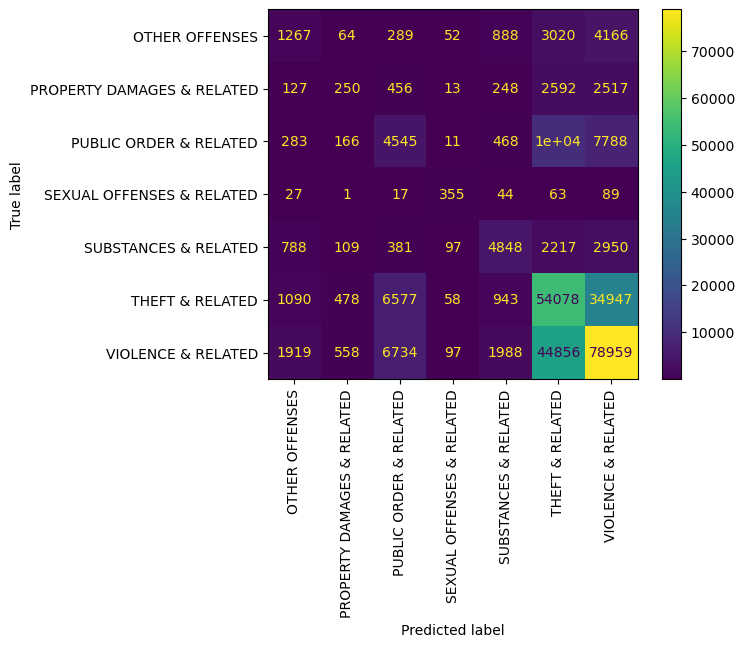

In [45]:
# Modelo de clasificación KNN

modelo_clasificacion(KNeighborsClassifier(), x_train, y_train, x_test, y_test)

c:\Users\lina.angel\AppData\Local\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\lina.angel\AppData\Local\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                            precision    recall  f1-score   support

            OTHER OFFENSES       0.44      0.02      0.03      9746
PROPERTY DAMAGES & RELATED       0.23      0.02      0.04      6203
    PUBLIC ORDER & RELATED       0.15      0.07      0.09     23489
 SEXUAL OFFENSES & RELATED       0.00      0.00      0.00       596
      SUBSTANCES & RELATED       0.28      0.98      0.44     11390
           THEFT & RELATED       0.47      0.87      0.61     98171
        VIOLENCE & RELATED       0.91      0.35      0.51    135111

                  accuracy                           0.51    284706
                 macro avg       0.35      0.33      0.25    284706
              weighted avg       0.64      0.51      0.48    284706



c:\Users\lina.angel\AppData\Local\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


(51.14, 51.05)

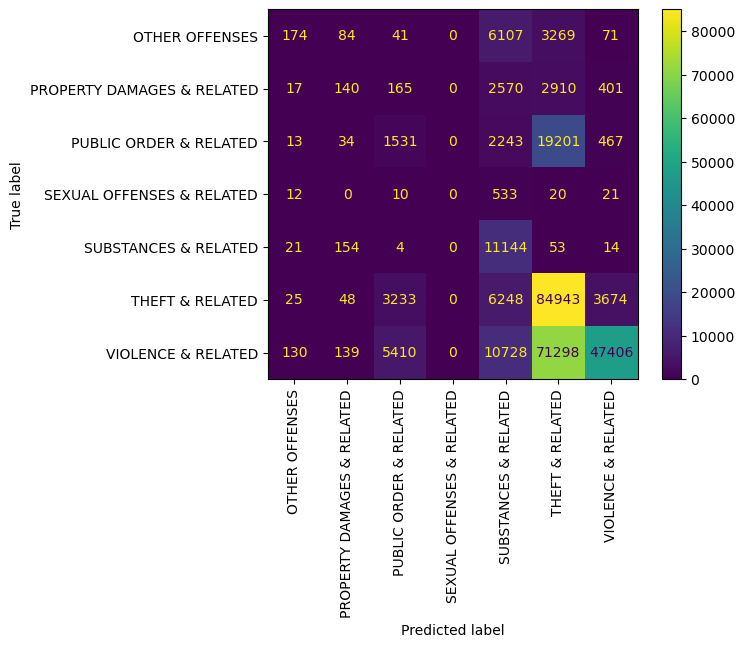

In [46]:
# Modelo de clasificación Naive Bayes
modelo_clasificacion(GaussianNB(), x_train, y_train, x_test, y_test)

                            precision    recall  f1-score   support

            OTHER OFFENSES       0.23      0.24      0.23      9746
PROPERTY DAMAGES & RELATED       0.10      0.11      0.10      6203
    PUBLIC ORDER & RELATED       0.23      0.26      0.25     23489
 SEXUAL OFFENSES & RELATED       0.51      0.57      0.53       596
      SUBSTANCES & RELATED       0.49      0.49      0.49     11390
           THEFT & RELATED       0.49      0.49      0.49     98171
        VIOLENCE & RELATED       0.61      0.59      0.60    135111

                  accuracy                           0.50    284706
                 macro avg       0.38      0.39      0.39    284706
              weighted avg       0.51      0.50      0.51    284706



(98.08, 50.41)

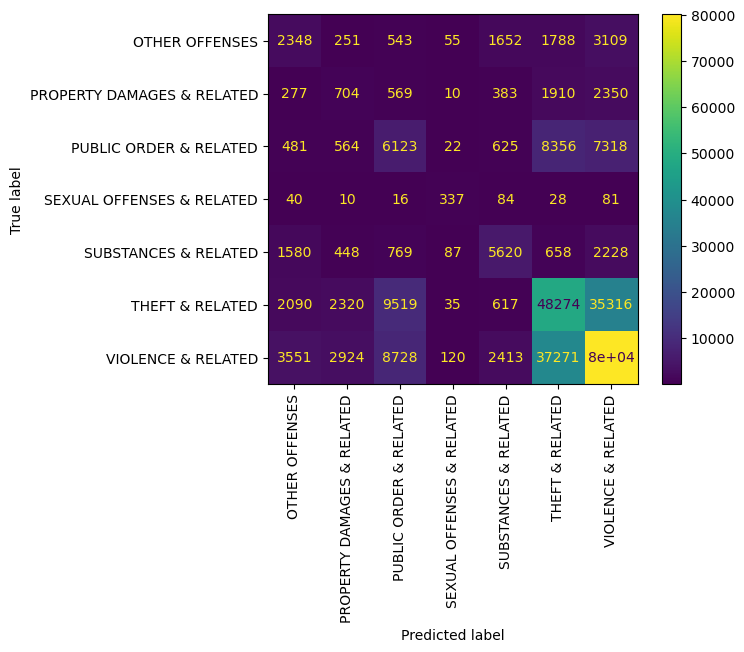

In [47]:
# Modelo de clasificación

modelo_clasificacion(DecisionTreeClassifier(), x_train, y_train, x_test, y_test)

In [48]:
from imblearn.over_sampling import SMOTE

In [49]:
# Balanceo de los datos
sm = SMOTE()
x2, y2 = sm.fit_resample(x, y)
print(x2.shape, y2.shape)

(3777438, 10) (3777438,)


<Axes: ylabel='count'>

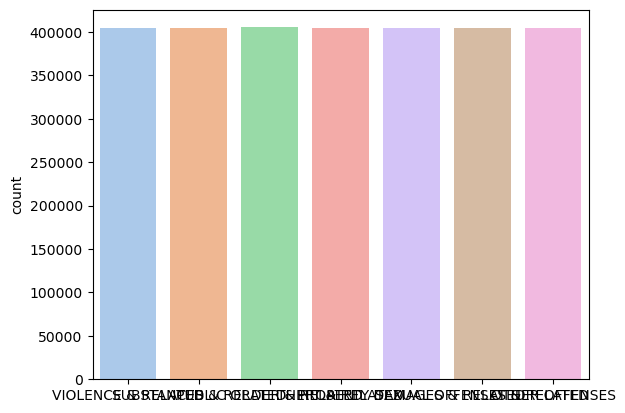

In [50]:
# Entramiento y Prueba

x_train, _, y_train, _ = train_test_split(x2, y2, test_size = 0.25)

sns.countplot(x=y_train)

In [51]:
# Modelo de clasificación KNN

modelo_clasificacion(KNeighborsClassifier(), x_train, y_train, x_test, y_test)

KeyboardInterrupt: 

                            precision    recall  f1-score   support

            OTHER OFFENSES       0.25      0.02      0.04      9662
PROPERTY DAMAGES & RELATED       0.06      0.02      0.03      6218
    PUBLIC ORDER & RELATED       0.15      0.24      0.19     23641
 SEXUAL OFFENSES & RELATED       0.06      0.01      0.01       580
      SUBSTANCES & RELATED       0.28      0.98      0.44     11354
           THEFT & RELATED       0.47      0.74      0.57     98442
        VIOLENCE & RELATED       0.91      0.34      0.49    134809

                  accuracy                           0.48    284706
                 macro avg       0.31      0.33      0.25    284706
              weighted avg       0.63      0.48      0.47    284706



(33.87, 47.53)

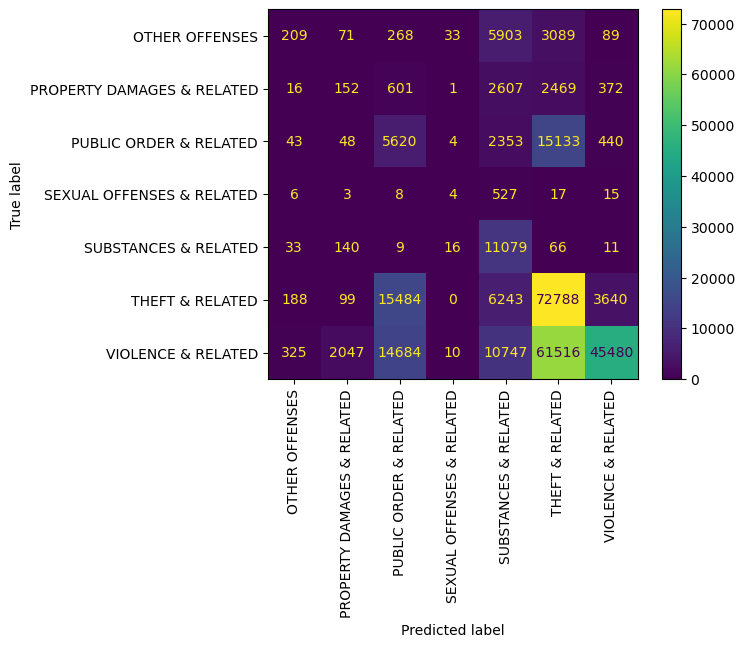

In [ ]:
# Modelo de clasificación Naive Bayes
modelo_clasificacion(GaussianNB(), x_train, y_train, x_test, y_test)

                            precision    recall  f1-score   support

            OTHER OFFENSES       0.70      0.91      0.79      9662
PROPERTY DAMAGES & RELATED       0.56      0.89      0.69      6218
    PUBLIC ORDER & RELATED       0.68      0.89      0.77     23641
 SEXUAL OFFENSES & RELATED       0.74      0.93      0.82       580
      SUBSTANCES & RELATED       0.86      0.93      0.89     11354
           THEFT & RELATED       0.87      0.86      0.86     98442
        VIOLENCE & RELATED       0.94      0.84      0.89    134809

                  accuracy                           0.86    284706
                 macro avg       0.76      0.89      0.82    284706
              weighted avg       0.87      0.86      0.86    284706



(98.05, 85.85)

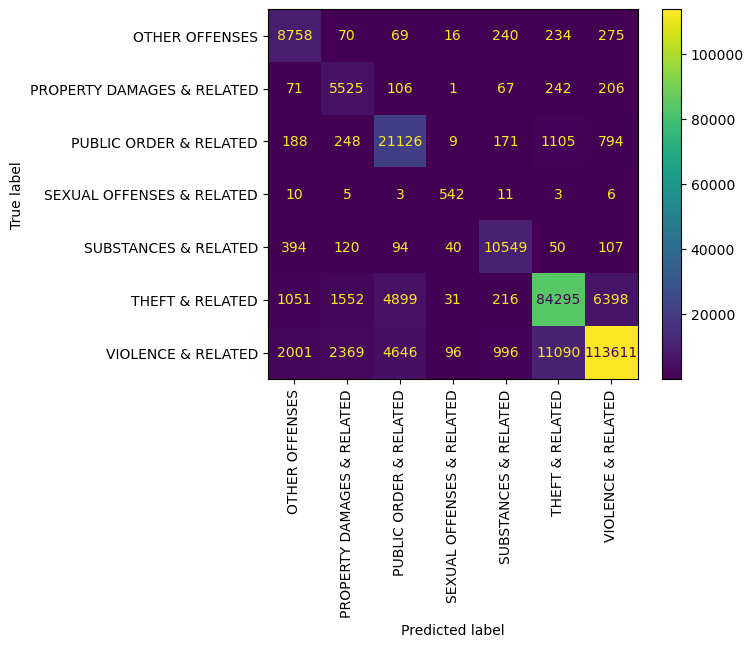

In [ ]:
# Modelo de clasificación Decision Tree Classifier

modelo_clasificacion(DecisionTreeClassifier(), x_train, y_train, x_test, y_test)

In [ ]:
# Importar optuna

import optuna 

In [ ]:
#Función de Sintonización

def op_DT (trial):

  _criterion = trial.suggest_categorical("criterion", ["gini", "entropy"])
  _splitter = trial.suggest_categorical("splitter", ["best", "random"])
  _max_depth = trial.suggest_categorical("max_depth", [1, 5, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100])
  _min_samples_leaf = trial.suggest_categorical("min_samples_leaf", [1, 2, 3, 4, 5, 6, 7, 8, 9, 10])


  model = DecisionTreeClassifier(criterion = _criterion,
                                 splitter= _splitter,
                                 max_depth = _max_depth,
                                 min_samples_leaf = _min_samples_leaf)
  
  cv = RepeatedStratifiedKFold(n_splits = 10, n_repeats = 3)

  return cross_val_score(model, x2, y2, scoring = "f1_macro", cv = cv, n_jobs=-1).mean()

study_DT = optuna.create_study(direction = 'maximize')
study_DT.optimize(op_DT, n_trials = 100)

trial = study_DT.best_trial

print('Accuracy: {}'.format(trial.value))
print("Best hyperparameters: {}".format(trial.params))

[I 2023-04-20 09:36:21,773] A new study created in memory with name: no-name-0c478452-6494-408f-9d35-b1b5bd32d1d5
[I 2023-04-20 09:39:37,195] Trial 0 finished with value: 0.7016974379826533 and parameters: {'criterion': 'entropy', 'splitter': 'random', 'max_depth': 30, 'min_samples_leaf': 9}. Best is trial 0 with value: 0.7016974379826533.
[I 2023-04-20 09:43:37,029] Trial 1 finished with value: 0.7592689118038751 and parameters: {'criterion': 'entropy', 'splitter': 'best', 'max_depth': 80, 'min_samples_leaf': 5}. Best is trial 1 with value: 0.7592689118038751.
[I 2023-04-20 09:47:31,532] Trial 2 finished with value: 0.757527235834971 and parameters: {'criterion': 'gini', 'splitter': 'best', 'max_depth': 100, 'min_samples_leaf': 5}. Best is trial 1 with value: 0.7592689118038751.
[I 2023-04-20 09:51:16,529] Trial 3 finished with value: 0.7280558535347204 and parameters: {'criterion': 'gini', 'splitter': 'best', 'max_depth': 50, 'min_samples_leaf': 10}. Best is trial 1 with value: 0.759

TerminatedWorkerError: A worker process managed by the executor was unexpectedly terminated. This could be caused by a segmentation fault while calling the function or by an excessive memory usage causing the Operating System to kill the worker.


In [ ]:
# Desarrollo de la optimización 

optuna.visualization.matplotlib.plot_optimization_history(study_DT)

NameError: name 'optuna' is not defined

<ipython-input-134-89a7112aa0ef>:3: ExperimentalWarning: plot_param_importances is experimental (supported from v2.2.0). The interface can change in the future.
  optuna.visualization.matplotlib.plot_param_importances(study_DT)


<AxesSubplot:title={'center':'Hyperparameter Importances'}, xlabel='Importance for Objective Value', ylabel='Hyperparameter'>

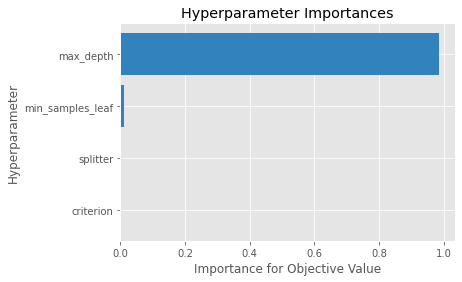

In [ ]:
# Importancia de las hiperparámetros
plt.subplots(figsize = (20,10))
optuna.visualization.matplotlib.plot_param_importances(study_DT)